In [1]:
## packages

import librosa
import sklearn

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

import os

import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%cd /content/drive/MyDrive/my_mus/

/content/drive/MyDrive/my_mus


In [4]:
## testing with a file

audio_path = '/content/drive/MyDrive/my_mus/Enrique Iglesias - Bailando.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))

print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(5989248,) 22050


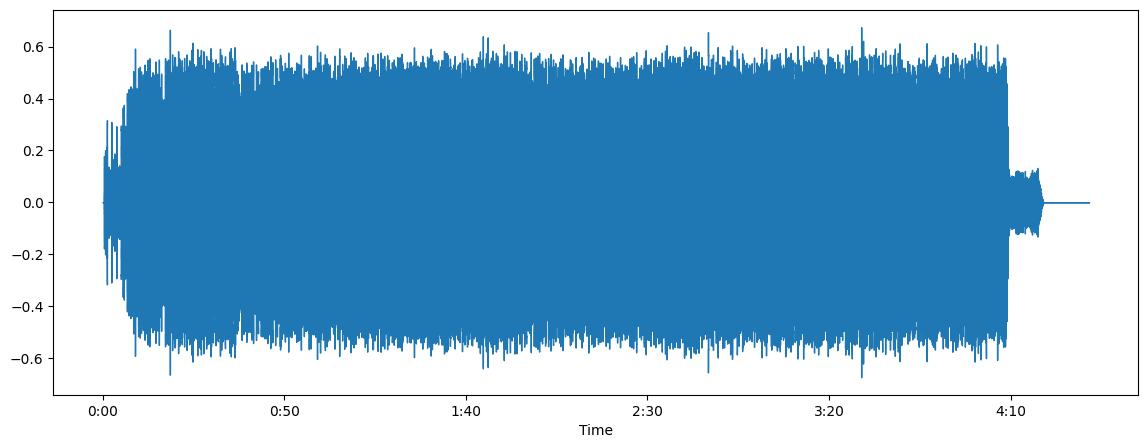

In [5]:
## ploting the file in waveform

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

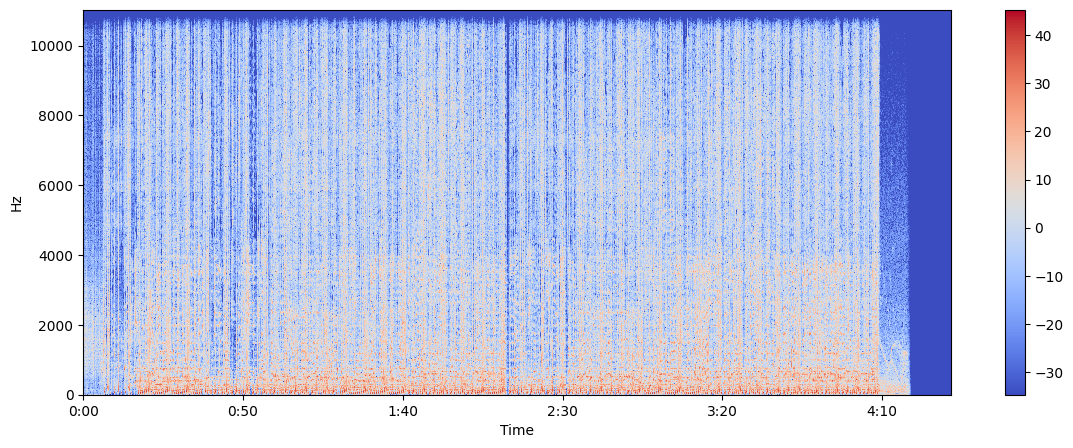

In [6]:
## converting the song into image using Spectrogram

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

### Feature Extraction

##### Zero crossig rate

The zero-crossing rate is the rate of sign-changes along with a signal, i.e., the rate at which the signal changes from positive to negative or back. This feature has been used heavily in both speech recognition and music information retrieval. It usually has higher values for highly percussive sounds like those in metal and rock.

21


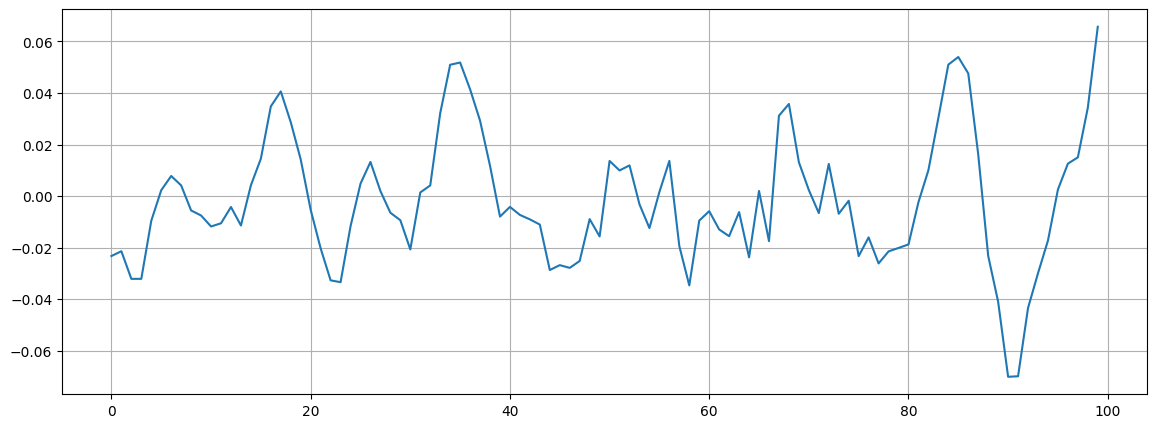

In [7]:


n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

##### Spectral Centroid
It indicates where the ” center of mass” for a sound is located and is calculated as the weighted mean of the frequencies present in the sound. Consider two songs, one from a blues genre and the other belonging to metal. Now, as compared to the blues genre song, which is the same throughout its length, the metal song has more frequencies towards the end. So spectral centroid for blues song will lie somewhere near the middle of its spectrum while that for a metal song would be towards its end.

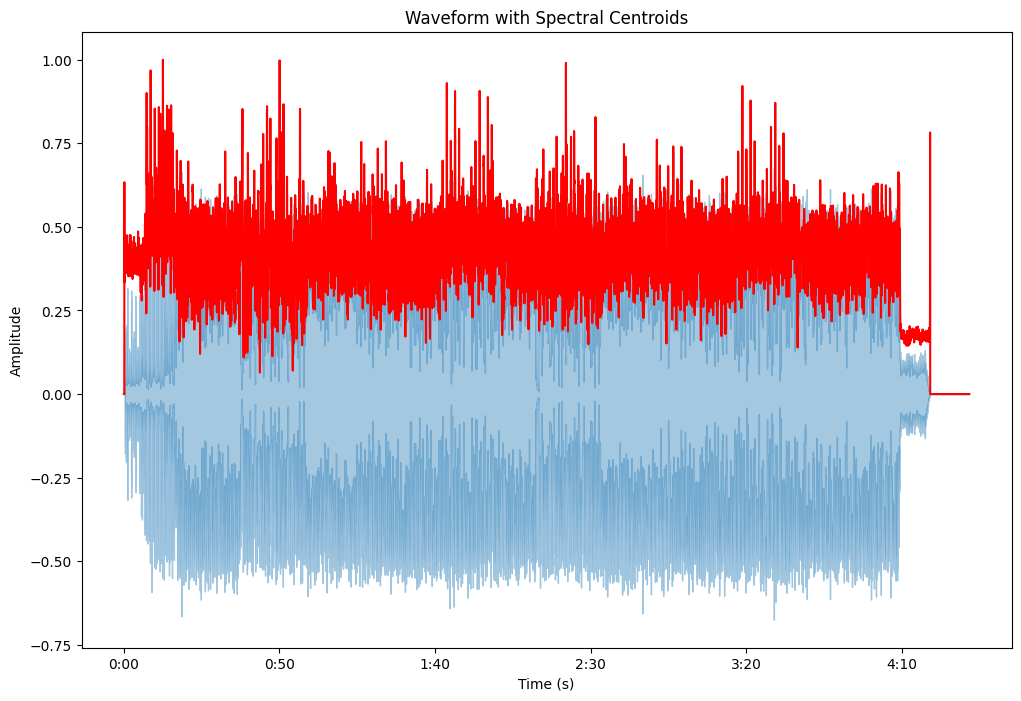

In [8]:
import librosa
import librosa.display
import sklearn.preprocessing
import matplotlib.pyplot as plt

# Assuming you have already loaded your audio signal 'x' and its sampling rate 'sr'
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

plt.figure(figsize=(12, 8))

# Plot the waveform
librosa.display.waveshow(x, sr=sr, alpha=0.4)

# Plot the normalized spectral centroids
plt.plot(t, normalize(spectral_centroids), color='r')
plt.title('Waveform with Spectral Centroids')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.show()


In [9]:
## include if all the genre is needed
# genre = os.listdir(path)
# print(genre)

genre = ['blues','classical','country','disco','hiphop','jazz','metal', 'pop','reggae','rock']

In [10]:
## feature extraction funciton

def normalize(x, axis=0):
        return sklearn.preprocessing.minmax_scale(x, axis=axis)

def zero_cross(x):
    n0 = 9000
    n1 = 9100
    zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
    return sum(zero_crossings)

def spec_center(x, sr):
    spectral_centroids = normalize(librosa.feature.spectral_centroid(x, sr=sr)[0])
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    ma = max(spectral_centroids)
    return t[np.where(spectral_centroids==ma)[0][0]]

In [11]:
import os
import librosa

# Example functions (replace with your actual implementations)
def zero_cross(x):
    # Your implementation here
    return 0.0  # Replace with the actual result

def spec_center(x, sr):
    # Your implementation here
    return 0.0  # Replace with the actual result

# Define the path and genres
path = '/content/drive/MyDrive/my_mus/Data/genres_original/'

# Create an empty list to store features
li = []

# Iterate through genres and songs
for gen in genre:
    for song in os.listdir(os.path.join(path, gen)):
        # Load audio file
        x, sr = librosa.load(os.path.join(path, gen, song))

        # Extract features and append to the list
        zero_cross_value = zero_cross(x)
        spec_center_value = spec_center(x, sr)

        # Check if features are not None before appending to the list
        if zero_cross_value is not None and spec_center_value is not None:
            li.append([round(zero_cross_value, 2), round(spec_center_value, 2), gen])

# Now, li contains the extracted features for each song in different genres



In [12]:
li = np.array(li)

### Implementing svm

In [13]:
X = li[:, 0:2]
y = li[:,2]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,y_train)

SVC(random_state=1)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 21,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 13,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 22,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 19,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 19,  0,  0,  0,  0,  0,  0]])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming li is your feature list [zero_cross, spec_center, genre]
# Extract features and labels
X = [[item[0], item[1]] for item in li]
y = [item[2] for item in li]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the classifier
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 6.00%


In [19]:
## testing for custom song

pa = '/content/drive/MyDrive/my_mus/Enrique Iglesias - Bailando.wav'
x, sr = librosa.load(pa)
print(classifier.predict(np.array([[zero_cross(x), round(spec_center(x, sr), 2)]])))

['disco']


In [27]:
## finding the best pair with more accuracy
from itertools import combinations
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import os
import librosa
import numpy as np

# Assuming zero_cross and spec_center functions are defined elsewhere in your code

def extract_features(path, genre):
    features = []
    for gen in genre:
        for song in os.listdir(os.path.join(path, gen)):
            x, sr = librosa.load(os.path.join(path, gen, song))
            features.append([zero_cross(x), round(spec_center(x, sr), 2), gen])
    return np.array(features)

def accuracy(genre, n_estimators=10):
    features = extract_features(path, genre)
    X = features[:, :2]
    y = features[:, 2]

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # Standardize features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Use BaggingClassifier with SVM as the base estimator
    base_classifier = SVC(kernel='rbf', random_state=1)
    bagging_classifier = BaggingClassifier(base_classifier, n_estimators=n_estimators, random_state=1)

    # Optimize hyperparameters using GridSearchCV
    param_grid = {'base_estimator__C': [0.1, 1, 10], 'base_estimator__gamma': [0.1, 1, 10]}
    grid_search = GridSearchCV(bagging_classifier, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Train the model with the best hyperparameters
    best_classifier = grid_search.best_estimator_
    best_classifier.fit(X_train, y_train)

    # Make predictions and calculate accuracy
    y_pred = best_classifier.predict(X_test)
    return round(accuracy_score(y_test, y_pred), 2)

# Specify the path to your audio data
path = '/content/drive/MyDrive/my_mus/Data/genres_original'

ge = ['jazz', 'metal']
# Increase the number of estimators for better bagging performance
print(f"{ge[0]} vs {ge[1]} accu: {accuracy(ge, n_estimators=50)}")

jazz vs metal accu: 0.45
